In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [3]:
mnist = load_digits()

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
X = mnist["data"]
Y = mnist["target"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

## visualization Data First 

In [8]:
X.shape

(1797, 64)

In [9]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


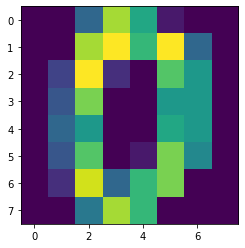

In [10]:
plt.imshow(X[0,:].reshape(8, 8))


In [11]:
Y[0]

0

 now reduction dementional by PCA or SVD 

In [12]:
from sklearn.decomposition import  PCA


In [13]:
pca = PCA(n_components=0.3)
X_reduc = pca.fit_transform(X)

In [14]:
X_reduc = pca.inverse_transform(X_reduc)

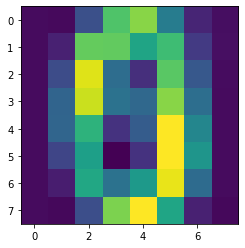

In [15]:
plt.imshow(X_reduc[0,:].reshape(8, 8))


In [16]:
pca = PCA(n_components=0.5)
X_reduc = pca.fit_transform(X)

In [17]:
X_reduc = pca.inverse_transform(X_reduc)

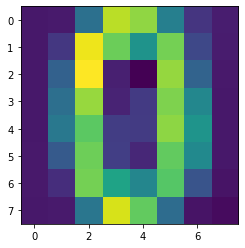

In [18]:
plt.imshow(X_reduc[0,:].reshape(8, 8))


now the reduction dementional is col becouse center image is importand and we can do that

In [19]:
from sklearn.linear_model import RidgeClassifier, ElasticNetCV, LassoCV

In [20]:
rgd_clf = RidgeClassifier(alpha=0.2, normalize=True)
lass_clf = LassoCV(alphas= 0.3, eps=0.05, cv=5)
elasticnet_clf = ElasticNetCV(eps=0.05, cv=5)

In [21]:
rgd_clf.fit(X_train, Y_train)
elasticnet_clf.fit(X_train, Y_train)

ElasticNetCV(cv=5, eps=0.05)

In [22]:
rgd_clf.score(X_test, Y_test)

0.9194444444444444

In [23]:
rgd_clf.intercept_

array([-0.66539668, -0.75937521, -0.79585306, -0.85454332, -0.61530267,
       -0.79199684, -0.72007519, -0.67858735, -1.30331622, -0.81555345])

In [24]:
elasticnet_clf.score(X_test, Y_test)

0.5321870568916702

In [25]:
elasticnet_clf = ElasticNetCV(eps=0.2, cv=5)
elasticnet_clf.fit(X_train, Y_train)
elasticnet_clf.score(X_test, Y_test)


0.4033536035447868

In [26]:
elasticnet_clf = ElasticNetCV(eps=0.01, cv=5)
elasticnet_clf.fit(X_train, Y_train)
elasticnet_clf.score(X_test, Y_test)

0.5804818213839253

In [27]:
elasticnet_clf = ElasticNetCV(eps=0.01, cv=25)
elasticnet_clf.fit(X_train, Y_train)
elasticnet_clf.score(X_test, Y_test)

0.5843243634853779

In [28]:
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.svm import LinearSVC 

In [29]:
ovo_clf = OneVsOneClassifier(LinearSVC(loss="hinge"), n_jobs=10)
ovr_clf = OneVsRestClassifier(LinearSVC(loss="hinge"), n_jobs=10)



In [30]:
ovr_clf.fit(X_train, Y_train)
ovr_clf.score(X_test, Y_test)

0.9222222222222223

In [31]:
ovr_clf.fit(X_train, Y_train)
ovr_clf.score(X_test, Y_test)

0.9361111111111111

In [32]:
from sklearn.svm import SVC

In [35]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(ovr_clf, X_train, Y_train, cv=10, scoring="accuracy")


array([0.97222222, 0.94444444, 0.95138889, 0.93055556, 0.94444444,
       0.94444444, 0.89583333, 0.94405594, 0.93006993, 0.93706294])

now one of the good model is ovr classfier now test ovo

In [39]:
cross_val_score(ovo_clf, X_train, Y_train, cv=10, scoring="accuracy")


array([0.97222222, 0.97222222, 0.97916667, 0.95833333, 0.97916667,
       0.98611111, 0.95833333, 0.99300699, 0.97202797, 0.95804196])

but the result of the ovo is better 

## Ensumbles

##

In [40]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier